# Garments Project (by: The Guo Family)

Garmets are worn every day by humans around the world. From the famous and highly sought after fashion houses such as the Haus of Gucci, Louis Vitton, Dior, down to the smaller fashion labels, humans have the tendency to buy what is on the shelf. But, behind all the garments that are sold on a day to day basis, what goes behind the scenes? In this project, we want to look at the reasoning between the overtime that happens in this current fashion house together with making three (3) models to predict the number of overtime that will happen in the future.

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
import os

In [3]:
df = pd.read_csv('garments.csv') # Importing garments.csv file to a pandas dataframe

After importing the dataset into the dataframe, we now look for errors and see what can we do for null cells.

In [4]:
# Dataset structure
print(df.info())  # Column names, data types, and non-null counts
print(df.describe())  # Statistics for numeric columns
print(df.head())  # Preview the first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

We see that there are null values in the WIP column, highlighted in the figure below:

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


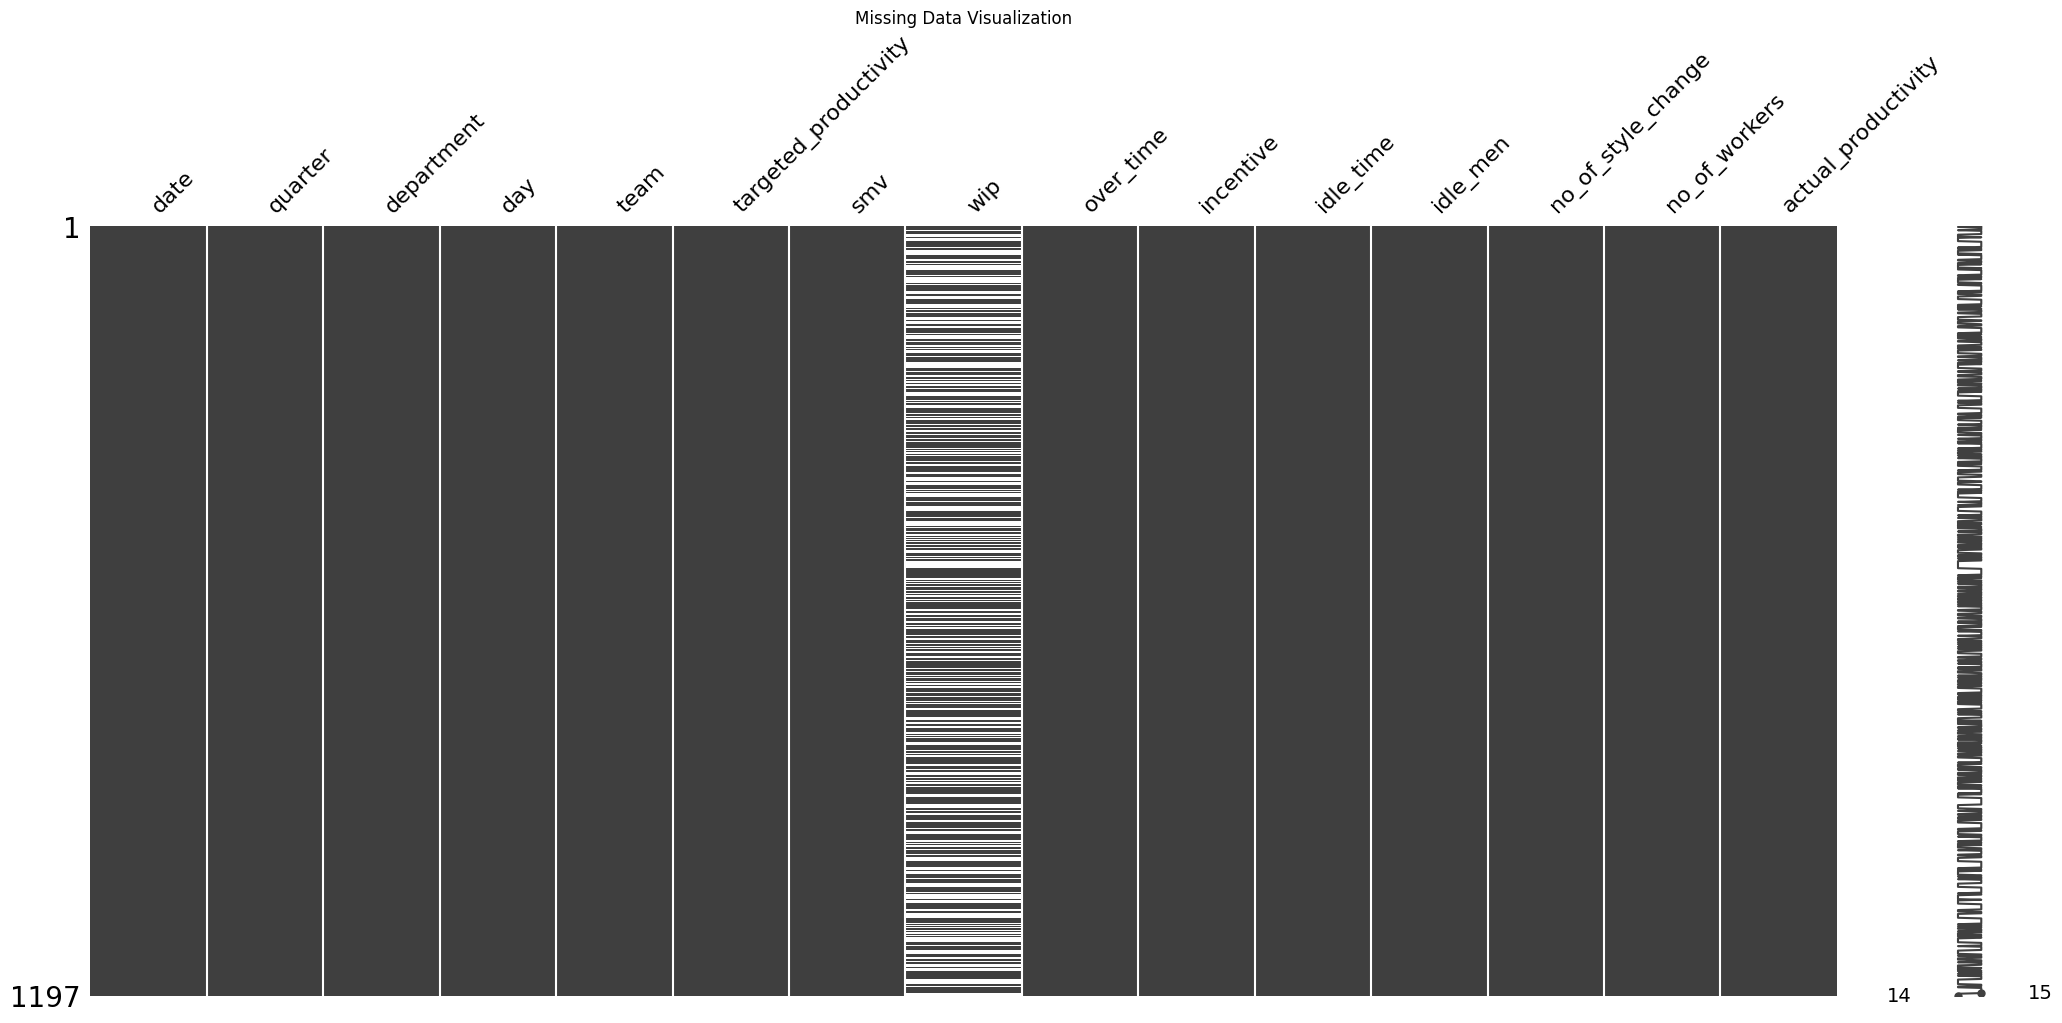

In [5]:
# Count missing values per column
print(df.isnull().sum())

# Visualize missing data
msno.matrix(df)
plt.title('Missing Data Visualization')
plt.show()

The team chose to replace empty cells with zero. This is doable since WIP stands for "work in progress" if the cell is null, it means that there are no projects that are "work in progress", making them null.

In [6]:
# Replace NaN values with 0
df = df.fillna(0)

# Replace empty strings with 0
df = df.replace('', 0)

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


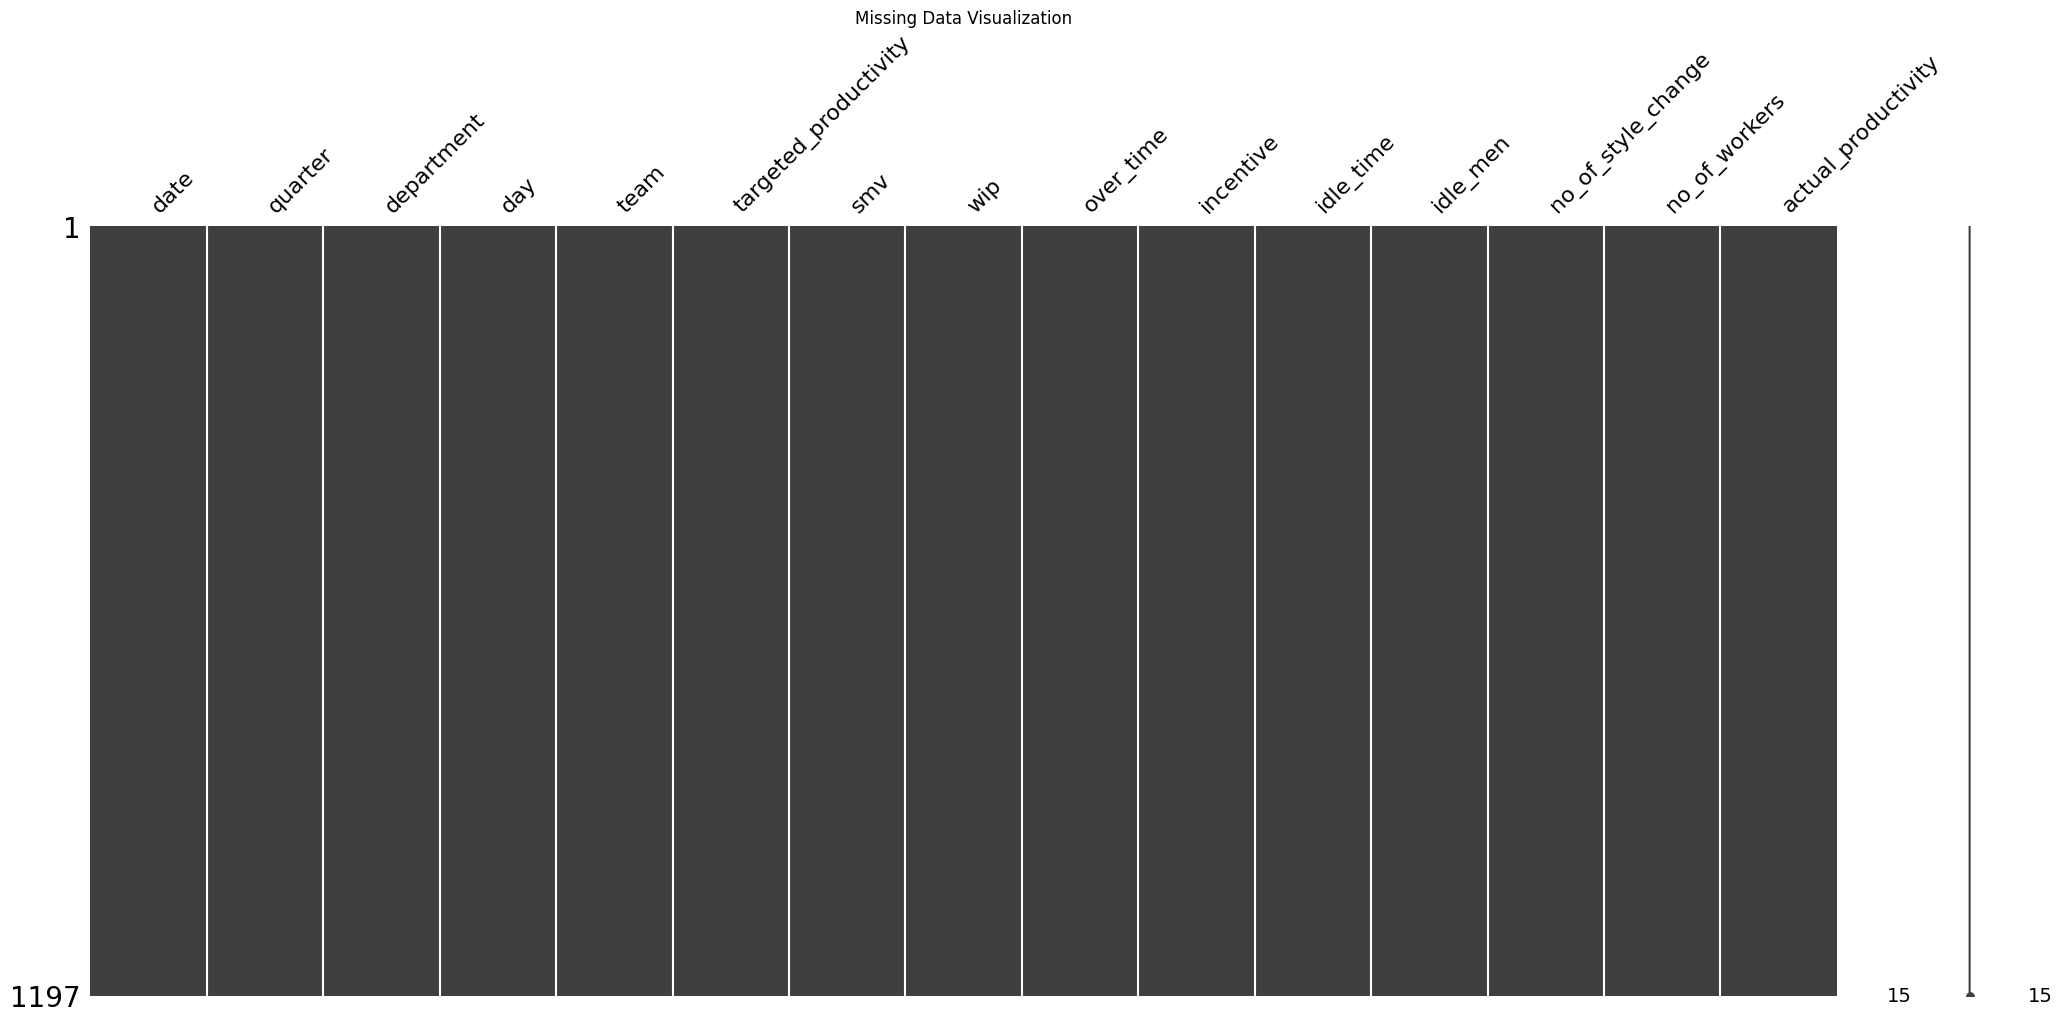

In [7]:
# Count missing values per column
print(df.isnull().sum())

# Visualize missing data
msno.matrix(df)
plt.title('Missing Data Visualization')
plt.show()

Here we're making sure that the dataset does not have any more null cells.

Afterwards, we make sure that all columns are consistent with their labels or whether or not their values are really integers or numerical.

In [8]:
# Summary statistics for numerical columns
numerical_summary = df.describe()
print(numerical_summary)

              team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000   1197.000000   
mean      6.426901               0.729632    15.062172    687.228070   
std       3.463963               0.097891    10.943219   1514.582341   
min       1.000000               0.070000     2.900000      0.000000   
25%       3.000000               0.700000     3.940000      0.000000   
50%       6.000000               0.750000    15.260000    586.000000   
75%       9.000000               0.800000    24.260000   1083.000000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.00

Oddly enough, the "team" column is labeled as "numerical" instead of "categorical". To change this, the researchers changed the property of the "team" column.

In [9]:
df['team'] = df['team'].astype('category')

In [10]:
# Summary statistics for numerical columns
numerical_summary = df.describe()
print(numerical_summary)

       targeted_productivity          smv           wip     over_time  \
count            1197.000000  1197.000000   1197.000000   1197.000000   
mean                0.729632    15.062172    687.228070   4567.460317   
std                 0.097891    10.943219   1514.582341   3348.823563   
min                 0.070000     2.900000      0.000000      0.000000   
25%                 0.700000     3.940000      0.000000   1440.000000   
50%                 0.750000    15.260000    586.000000   3960.000000   
75%                 0.800000    24.260000   1083.000000   6960.000000   
max                 0.800000    54.560000  23122.000000  25920.000000   

         incentive    idle_time     idle_men  no_of_style_change  \
count  1197.000000  1197.000000  1197.000000         1197.000000   
mean     38.210526     0.730159     0.369256            0.150376   
std     160.182643    12.709757     3.268987            0.427848   
min       0.000000     0.000000     0.000000            0.000000   
25

After checking that all of the values that are described in this table are numerical, we normalize the data in these columns (except over_time).

In [11]:
# Select only numerical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.difference(['over_time'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the numeric columns and update the DataFrame
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Summary statistics for numerical columns
numerical_summary = df.describe()
print(numerical_summary)

       targeted_productivity          smv          wip     over_time  \
count            1197.000000  1197.000000  1197.000000   1197.000000   
mean                0.903606     0.235427     0.029722   4567.460317   
std                 0.134097     0.211832     0.065504   3348.823563   
min                 0.000000     0.000000     0.000000      0.000000   
25%                 0.863014     0.020132     0.000000   1440.000000   
50%                 0.931507     0.239257     0.025344   3960.000000   
75%                 1.000000     0.413473     0.046839   6960.000000   
max                 1.000000     1.000000     1.000000  25920.000000   

         incentive    idle_time     idle_men  no_of_style_change  \
count  1197.000000  1197.000000  1197.000000         1197.000000   
mean      0.010614     0.002434     0.008206            0.075188   
std       0.044495     0.042366     0.072644            0.213924   
min       0.000000     0.000000     0.000000            0.000000   
25%       0

After normalizing the values in the numerical column, the researchers move on to looking at the categorical columns.

In [12]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object'])

# Analyze each categorical column
for col in categorical_columns.columns:
    print(f"Column: {col}")
    print(f"Mode: {df[col].mode()[0]}")  # Mode (most frequent value)
    print(f"Unique values: {df[col].unique()}")  # List of unique values
    print(f"Value counts:\n{df[col].value_counts()}")  # Frequency of each category
    print("\n")

Column: date
Mode: 1/31/2015
Unique values: ['1/1/2015' '1/3/2015' '1/4/2015' '1/5/2015' '1/6/2015' '1/7/2015'
 '1/8/2015' '1/10/2015' '1/11/2015' '1/12/2015' '1/13/2015' '1/14/2015'
 '1/15/2015' '1/17/2015' '1/18/2015' '1/19/2015' '1/20/2015' '1/21/2015'
 '1/22/2015' '1/24/2015' '1/25/2015' '1/26/2015' '1/27/2015' '1/28/2015'
 '1/29/2015' '1/31/2015' '2/1/2015' '2/2/2015' '2/3/2015' '2/4/2015'
 '2/5/2015' '2/7/2015' '2/8/2015' '2/9/2015' '2/10/2015' '2/11/2015'
 '2/12/2015' '2/14/2015' '2/15/2015' '2/16/2015' '2/17/2015' '2/18/2015'
 '2/19/2015' '2/22/2015' '2/23/2015' '2/24/2015' '2/25/2015' '2/26/2015'
 '2/28/2015' '3/1/2015' '3/2/2015' '3/3/2015' '3/4/2015' '3/5/2015'
 '3/7/2015' '3/8/2015' '3/9/2015' '3/10/2015' '3/11/2015']
Value counts:
date
1/31/2015    24
3/11/2015    24
1/11/2015    23
1/24/2015    23
1/12/2015    23
3/10/2015    23
1/8/2015     22
1/13/2015    22
1/22/2015    22
1/10/2015    22
1/7/2015     22
3/9/2015     22
3/3/2015     22
1/5/2015     22
3/8/2015     22
1

We see in the "department" column, there are three departments, two of them are the same 'finishing ' and 'finishing'. To comabt that, we delete the trailing whitespace so that 'finishing ' and 'finishing' will be in the same category.

In [13]:
# Remove leading and trailing whitespace from the 'department' column
df['department'] = df['department'].str.strip()

# Verify the unique values and value counts again
print("Unique values:", df['department'].unique())
print("Value counts:\n", df['department'].value_counts())

Unique values: ['sweing' 'finishing']
Value counts:
 department
sweing       691
finishing    506
Name: count, dtype: int64


After correcting data inside categorical columns, we move on to adding some columns to help with parsing through data.

In [14]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.month  # Extract the month
df['month'] = df['month'].astype('category')

Finally, we move on to looking at the data itself and see what does it mean to this certain fashion haus.

# Exploring the data

Firstly, we look at the distribution of each numerical data and see what it means to the data itself.

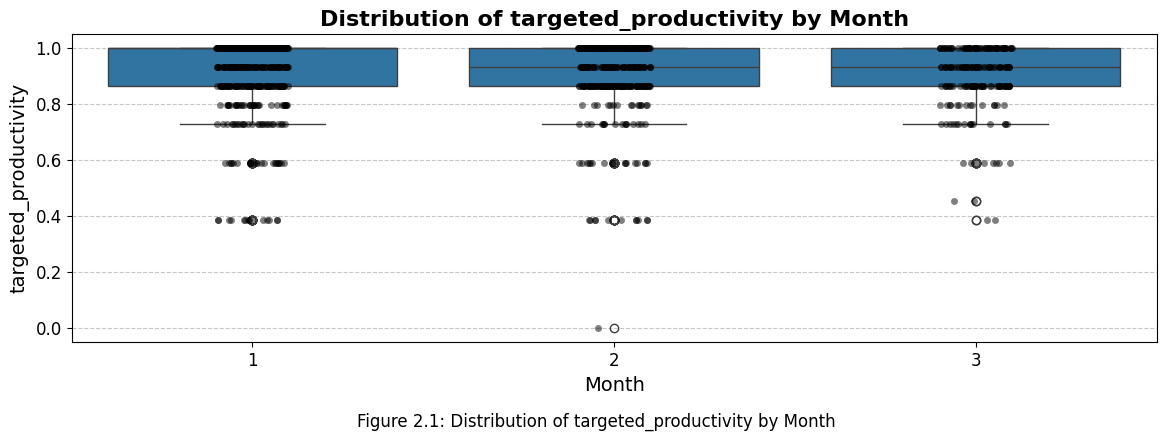

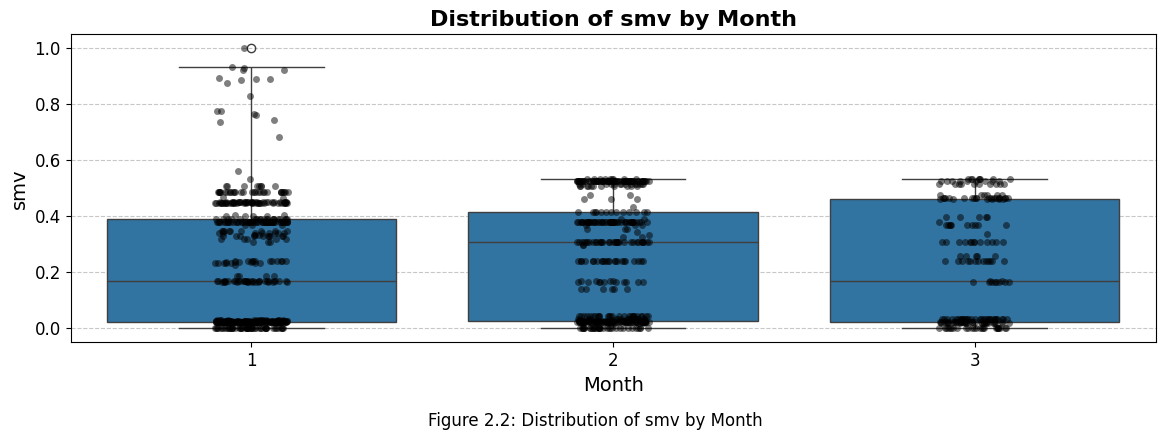

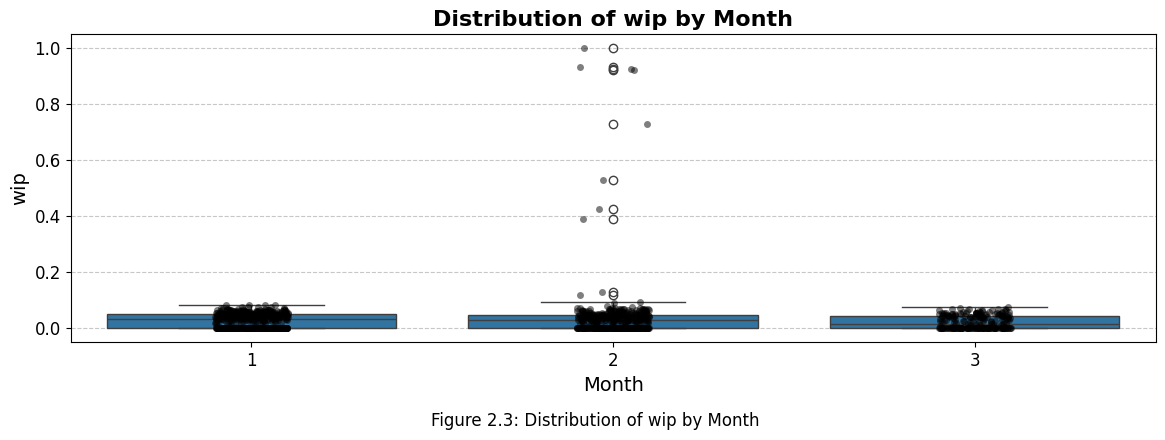

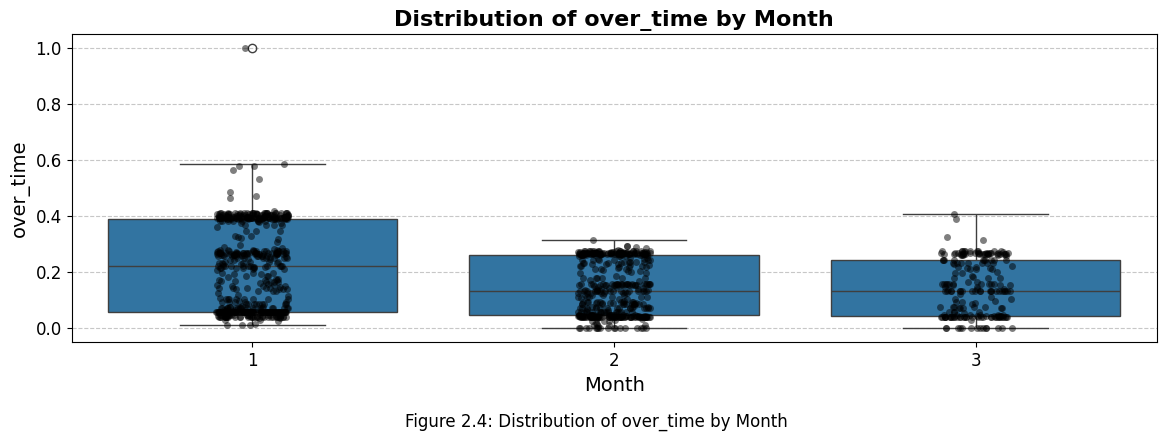

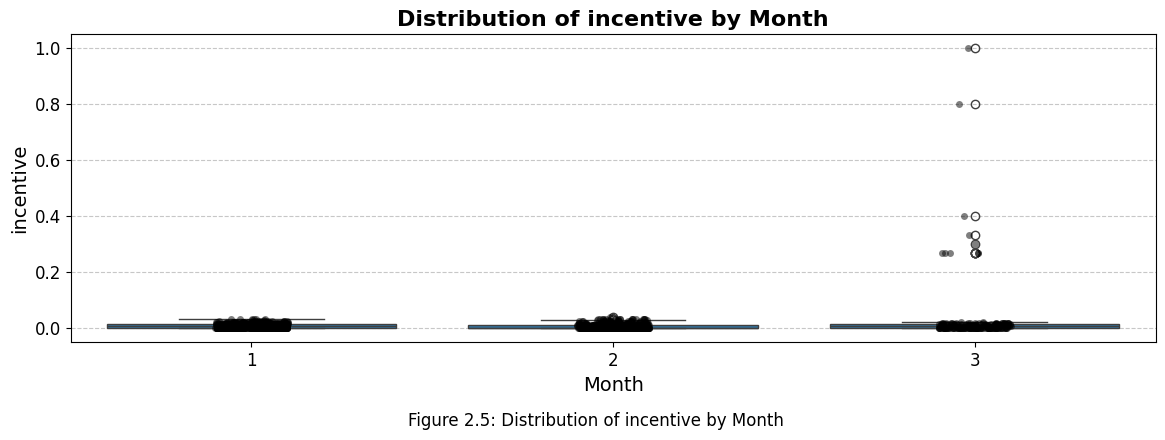

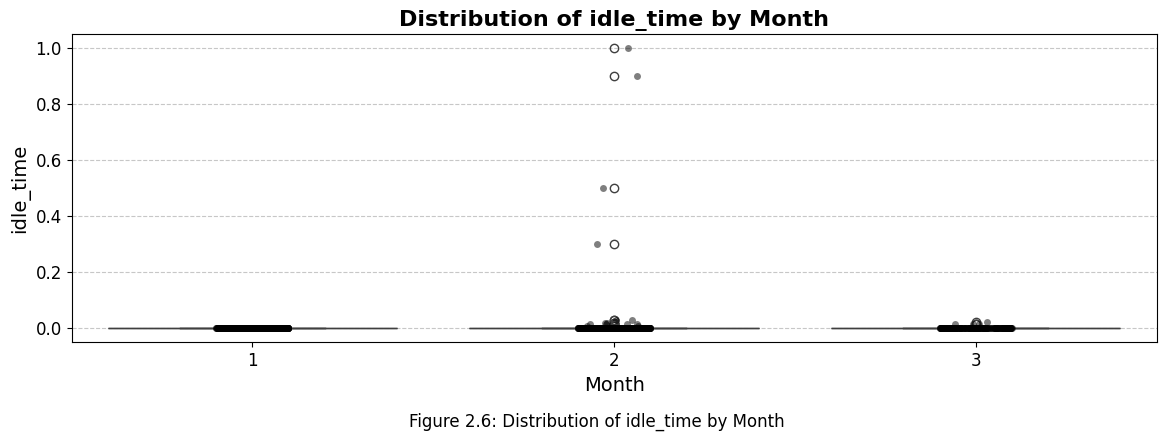

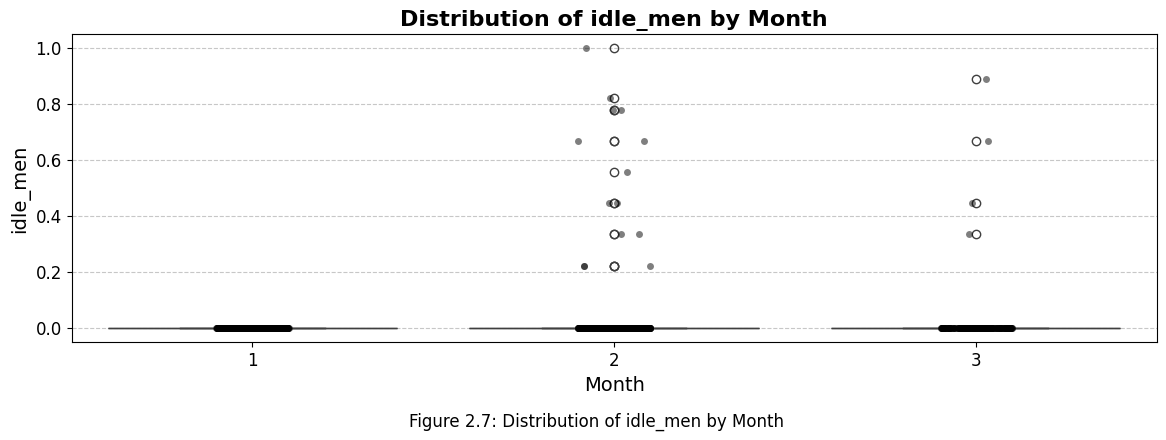

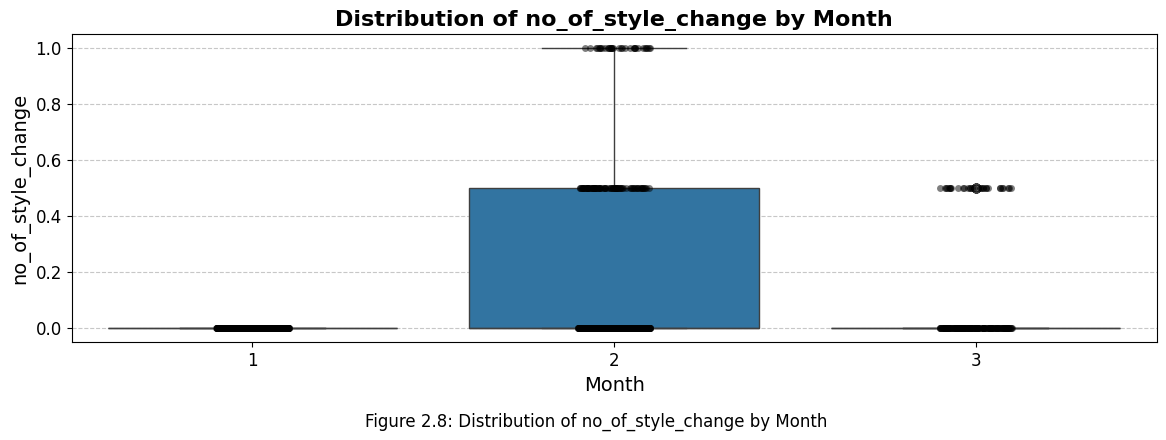

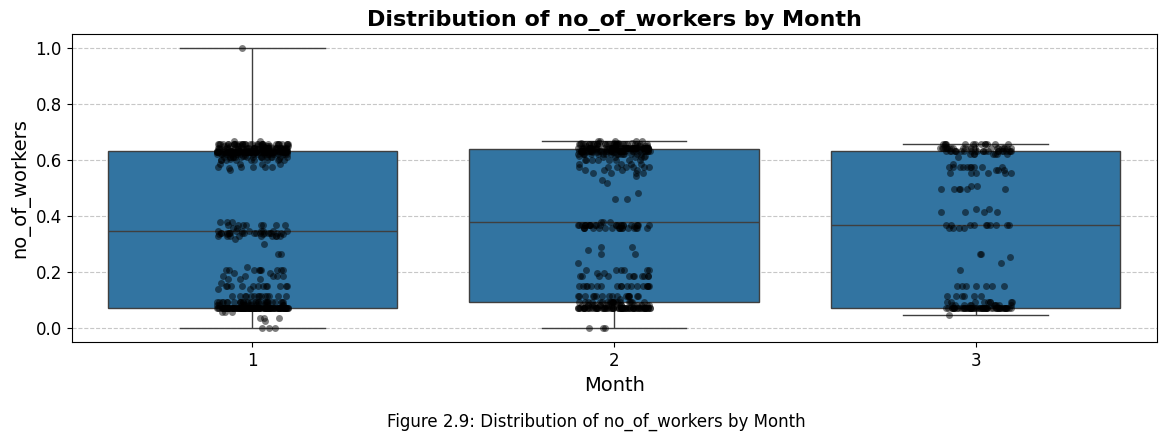

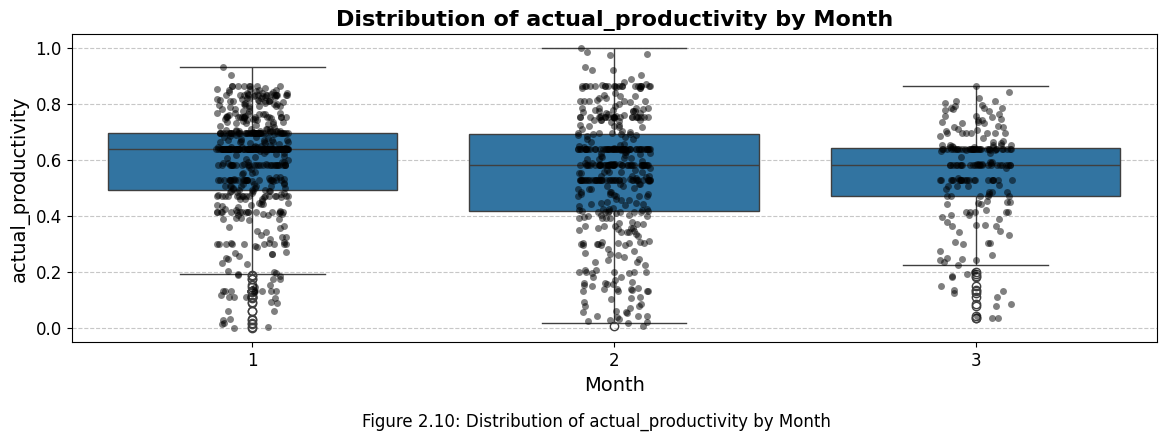

In [15]:
# Starting figure numbers
major_figure_number = 2
minor_figure_number = 1

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Normalize numeric columns (optional step)
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Function to save and display plots
def plot_and_save(column, major_num, minor_num):
    # Create figure number
    figure_number = f"{major_num}.{minor_num}"
    
    # Create plot
    plt.figure(figsize=(14, 4))  # Adjust figure size
    sns.boxplot(x='month', y=column, data=df, showfliers=True)  # Boxplot
    sns.stripplot(x='month', y=column, data=df, color='black', alpha=0.5, jitter=0.1, dodge=False)  # Reduced jitter
    plt.title(f'Distribution of {column} by Month', fontsize=16, fontweight='bold')  # Title
    plt.xlabel('Month', fontsize=14)
    plt.ylabel(column, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
    plt.figtext(0.5, -0.1, f"Figure {figure_number}: Distribution of {column} by Month", ha='center', fontsize=12)  # Add figure label as a caption
    plt.show()

# Loop through numeric columns and plot
for col in numeric_columns:
    plot_and_save(col, major_figure_number, minor_figure_number)
    minor_figure_number += 1  # Increment the minor figure number


Figure 2.1: Distribution of Target Productivity By Month

Targeted productivity spread is constant across time (i.e., uniform over time) and most values are very close to 0.8. This implies that (manifested by season or workload), the work of the organization has a, not arbitrary, and therefore reproducible, "standard" of performance. Small outliers, especially in Month 1, are explained by cases of potential production unavailability caused by technical/operational issues i.e. These challenges may be due to, e.g., the start of the new project cycle, device malfunction, or exogenous demand changes. Detection of this kind of anomalies can be valuable, to adapt the production cycle based production to expectation.

Figure 2.2: Distribution of SMV (Standard Minute Value) by Month

The range of SMV domain values is wider in Month 1 than the narrower, less variable ranges in Months 2 and 3. This Month 1 variability likely reflects (i) a global contrast of task complexity or order category of operational activity, and (ii) a portion of a developmental range of task complexity or order category. The narrower task range in the later months indicates that the task standardization is better or the workflow is better optimized. The higher dispersion in Month 1 could be an indication of a tip to plan and train more effectively on how to overcome this variability and to optimize operations.

Figure 2.3: Distribution of WIP (Work in Progress) by Month

All this while WIP is kept at a low level for several months, resulting in an extremely high work fluid management effectiveness and it results in a very low backlog in the production line. Yet due to a very high content of outliers in Month 2, the process sometimes exhibits some degree of imprecision (i.e., bottlenecks, unavailability of raw material, the delay in raw material supply/demand shock). Anomalies of the sort may also necessitate customized interventions including contingency planning or enhanced communication in order to avoid recurrences in the future and achieve sustained performance.

Figure 2.4: Distribution of Overtime by Month

Overtime is at its peak in Month 1, and it trend is also strongly decreasing with time into the following months. That pattern, together with extreme month 1 values, also reflects a baseline preference for overtime in producing or correcting time or function errors/dysmorphia. The trend of less overtime in the latterly of the months is to more effective task organization and time management and which further implies that the organization is growing and adapting to what is the more efficient way to approach tasks. Alternatively, the prolonged overtime in Month 1 may result in the higher labor cost and work fatigue, and, for this reason, deserves alternative plan in this month to decrease the overtime dependence.

Figure 2.5: Distribution of Incentive by Month

Incentives are always low to some degree, with a few of the highest incentives outliers. This would imply that at the organisation performance-based premia are not one of the leading drivers in attracting the workforce at the organisation. Uncommon, excellent rewards are the result of attention being paid to a very exceptional job activity. How for instance, the use of more reliable reward systems (by improving incentives, etc.) motivate and produce employees in the long run, can be described.

Figure 2.6: Distribution of Idle Time by Month

Time utilization is very low over each month suggesting optimal task scheduling and resource efficiency, though resource optimization is highly standardized. There are, nevertheless, a few, month 2, high outliers, which suggest opportunities for underutilization that might be due to equipment malfunction, or a scheduling gap or lack of raw material delivery. Through resolving these problems by using the best possible maintenance schedules and contingency plans, a deficiency in efficiency, as a result, can be avoided and production becomes better structured.

Figure 2.7: Distribution of Idle Men by Month

Idle worker count is also sparse across all months, and for all months there are also (some/more) instances of outliers in Month 2. That is, it is in keeping with low average idle time, and hence it is concluded that work does not generally spend idle time. Nevertheless, Month 2 variability is interesting in that it suggests problems, including task heterogeneity, intermittent service interruptions, or imbalances in workforce planning. Practices in such areas have the potential to be made better in order to enable continuous worker productivity and minimise downtime.

Figure 2.8: Distribution of Number of Style Changes by Month

The number of style transitions is much larger in Month 2 compared to Months 1 and 3, where they are extremely low. This Month(2) rises may be due to seasonal demand, client-specific or designs changes of the products. Although it reflects the resource to handle a big audience, the rise of complexity at this level may be too much from the point of view of the resource and may even affect the other metrics, for instance, WIP or overtime. Proactive planning and resource management will be useful during these contexts to be able to lower the complexity effectively.

Figure 2.9: Distribution of Number of Workers by Month

The number of employees is relatively constant through months, and only marginally fluctuates across Month 1. This stability has been sustained over many years, by throughhografie of workforce planning, and programming of resources at the organization. There is a small difference between Month 1 for which staff onboarding is a potential explanation, the evolution in the size of the working groups due to production ramping up, or other operations related to operation run. Successful workforce preparation at the beginning of production cycles can still lead to efficiencies.

Figure 2.10: Distribution of Actual Productivity by Month

Actual productivity shows a greater degree of variability than the performance goals that are desired. Although the values of the measured productivity fall between 0.6 and 0.8 for the vast majority of the recorded values, there are also some extreme values which are especially present in the first month and a number of these bottom values of performance are present there. This fluctuation raises some questions in term of target point attainment, especially in the early stages of the production line. On the other hand, productivity values in Months 2 and 3 are less erratic and more close to the targets, each reflecting better performance over time.

The stationarity between targeted and actual productivity in the same period demonstrates a continuous performance error. Even with the company's ambitious goals, in fact, it seems that operational processes or capacity alone is not going to be responsible for achieving this goal. This discrepancy can result in a disappointment of expectations or an inability to fulfil client needs. Furthermore, the high proportion of Month 1 challenges suggests early production cycle waste that includes new hire integration, equipment care and workflow modification. Nonetheless, the subsequent months of incremental improvement by the agency shows that, despite the delay, the agency is able to learn and reconfigure its practices.

Now that we looked at the different values in numerical columns, let's move on to categorical values and see how the company is operating.

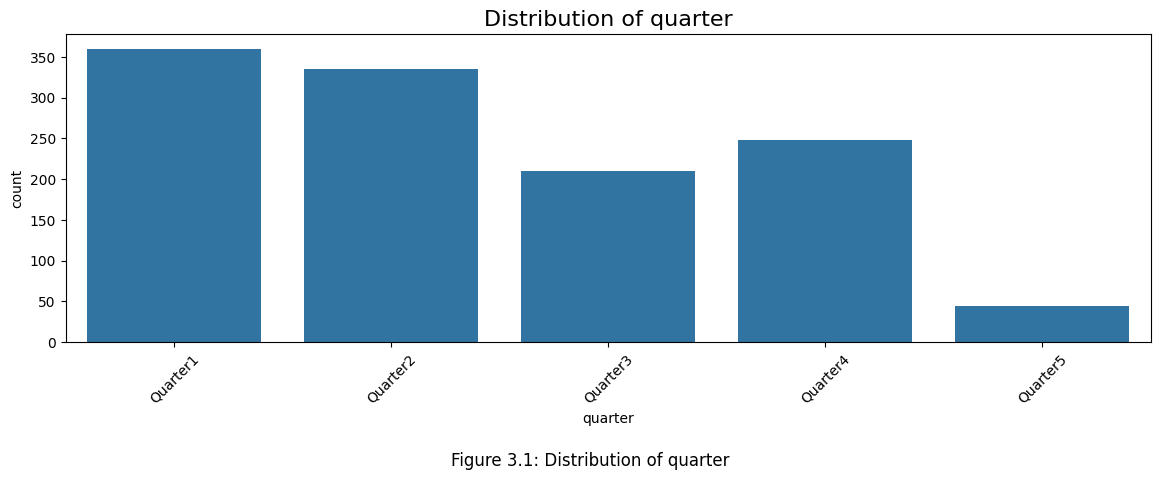

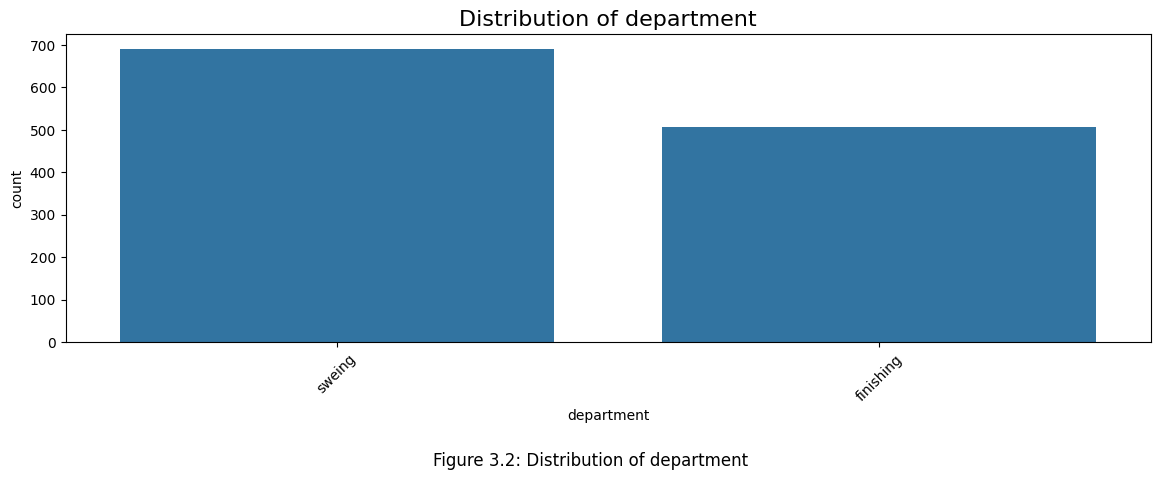

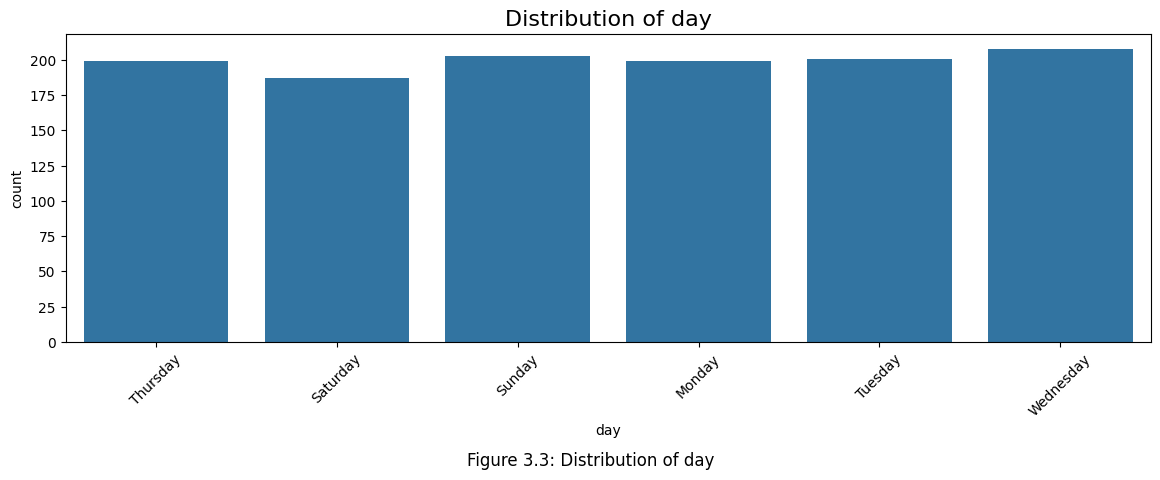

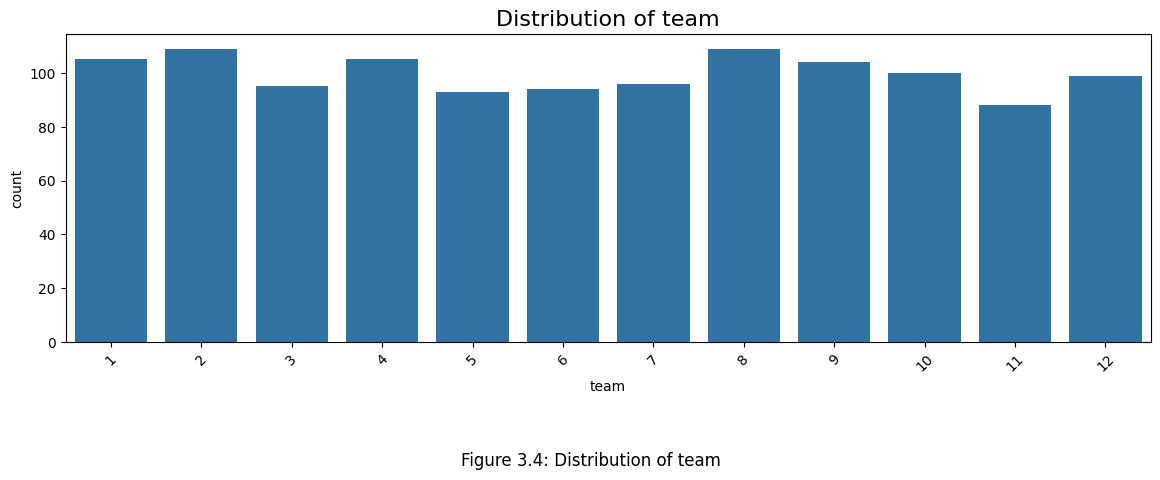

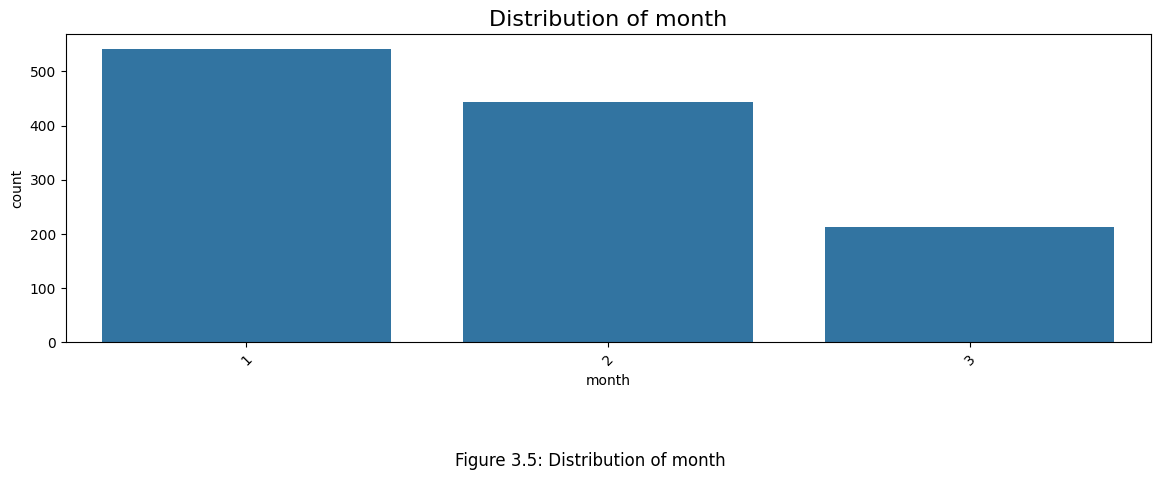

In [16]:
# Dynamically identify remaining categorical columns (excluding numeric and date columns)
categorical_columns = df.select_dtypes(exclude=['float64', 'int64']).columns  # Excludes numeric columns

# Exclude the 'date' column if present
categorical_columns = [col for col in categorical_columns if col != 'date']

# Starting figure numbers
major_figure_number = 3  # Starting figure major number
minor_figure_number = 1  # Starting figure minor number

# Check unique values and distributions for the remaining categorical features
for col in categorical_columns:
    # Create figure number
    figure_number = f"{major_figure_number}.{minor_figure_number}"
    
    # Plot the distribution
    plt.figure(figsize=(14, 4))  # Adjust figure size
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xticks(rotation=45)
    plt.figtext(0.5, -0.2, f"Figure {figure_number}: Distribution of {col}", ha='center', fontsize=12)  # Add figure label as a caption
    plt.show()
    
    # Increment minor figure number
    minor_figure_number += 1

Figure 3.1: Distribution of Quarter

Distribution of quarters indicates that the data are not equally distributed among the quarters. Entries are overweighted in the two quarters 1 and 2, and underweighted in quarter 5. This position is that the data collection could be subject to starting of year bias or that the activities being monitored were more relevant in Quarters 1 and 2. The sparse data in Quarter 5 may be due to reporting of partial data, or a lower number of units, and may therefore bias analyses of a core data for quarters.

Figure 3.2: Distribution of Department

The department distribution suggests that the majority of the entries are related to the "sweing" department, and sparsely to the "finishing" department. This is consistent with the fact that sewing appears to be the primary target or bottleneck in the process of manufacturing, in line with industries where sweing can often be a more demanding task in terms of resources and time. Such observation raises a possible necessity of optimizing workforce or resource allocation to the finishing department in order to achieve an optimal production efficiency.

Figure 3.3: Distribution of Day

The distribution of number of days looks quite uniform, roughly equal number of days per day. This applies for the activity or production volume of days per week, which can be explained by a "worn-out" work structure. But, for any small change, its assessment is required so as to be able to detect any possible inefficiencies or inconsistencies, which can be exploited to distinguish specific days.

Figure 3.4: Distribution of Team

Distribution of teams reveals that counts are reasonably uniform among teams, with, of course, minor differences. Among other things, this means the workload will probably be reasonably balanced across the teams so equity in the outputs can be achieved. Nevertheless, the relatively small amendments could be a clue of performance or workload variation warrants further examination in order to guarantee performance is optimal between workgroups.

Figure 3.5: Distribution of Month

This ranging over months indicates the highest number of entries in Month 1, followed by Month 2 and Month 3. This asymmetric distribution points to the possibility that data collection/generation processes may have caused an initial gain in the first few months of the observation period, and then a loss sel. This could happen as a result of seasonality, changes in demand or exposure. Patterns can be exploited to optimize resource management and scheduling production dates.

Next, we move on to the correlation matrix and see what variables are linearly correlated to overtime.

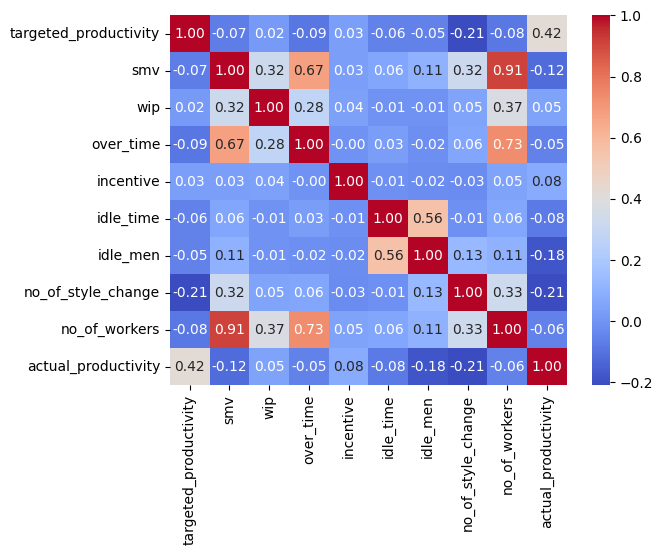

<Figure size 1400x400 with 0 Axes>

Correlation with Overtime:
 over_time                1.000000
no_of_workers            0.734164
smv                      0.674887
wip                      0.276529
no_of_style_change       0.059790
idle_time                0.031038
incentive               -0.004793
idle_men                -0.017913
actual_productivity     -0.054206
targeted_productivity   -0.088557
Name: over_time, dtype: float64


In [17]:
# Correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64'])  # Extract actual numeric data
correlation_matrix = numeric_columns.corr()  # Compute correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.figure(figsize=(14, 4))  # Adjust figure size
plt.show()

# Correlations with 'over_time'
correlation_with_overtime = correlation_matrix['over_time'].sort_values(ascending=False)
print("Correlation with Overtime:\n", correlation_with_overtime)


Strong Correlation with smv (Standard Minute Value):

The correlation between overtime and smv is 0.67, which shows a strong positive association. Specifically, in the conventional minute value (SMV) growth environment, it is clear that also overtime is increasing. There could be an indication that such complex time and complexity consuming tasks are associated with a proportionally increased overtime rate usage.

Moderate Correlation with no_of_workers:

The correlation is 0.73 and thus indicates that the association between the number of workers and the number of overtime shifts is multiplicative and moderate at the binary level. It can be seen as the idea that, in general, overtied larger groups tend to be overtied over time, probably because of a lack of coordination or a very heavy workload.

Weak Correlation with wip (Work in Progress):

The correlation is 0.28, indicating a weak positive relationship. For example, whereas an uptrend in WIP is likely to, this device does not have the appropriate size.

Negligible Correlations: Negligible Correlations:

However, the metrics incentive, idle_time, idle_men, no_of_style_change and actual_productivity are strongly and/or not correlated with overtime (correlations very far to 0). These are the reasons that there should be no direct linear relationship between these variables and overtime.

The graphs below shows evidence on the correlation between overtime and the columns with strong and weak correlation.

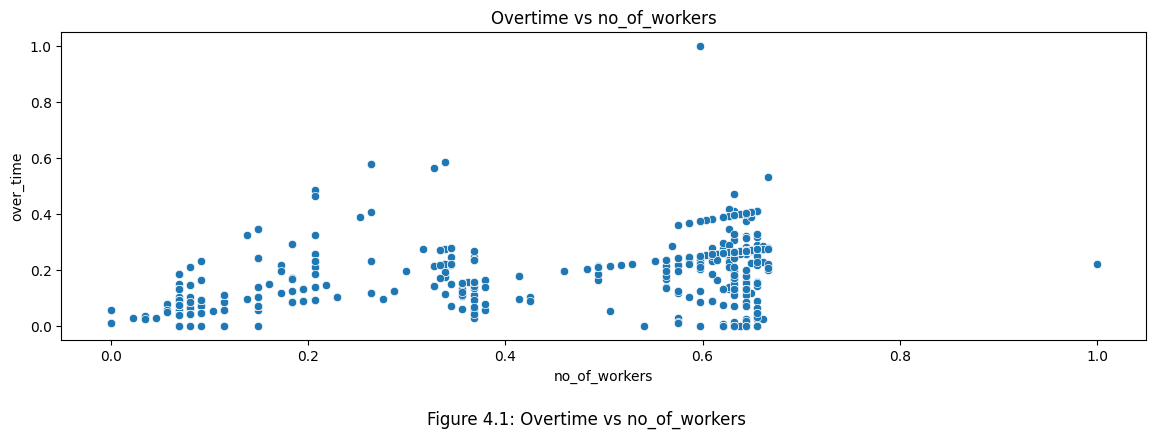

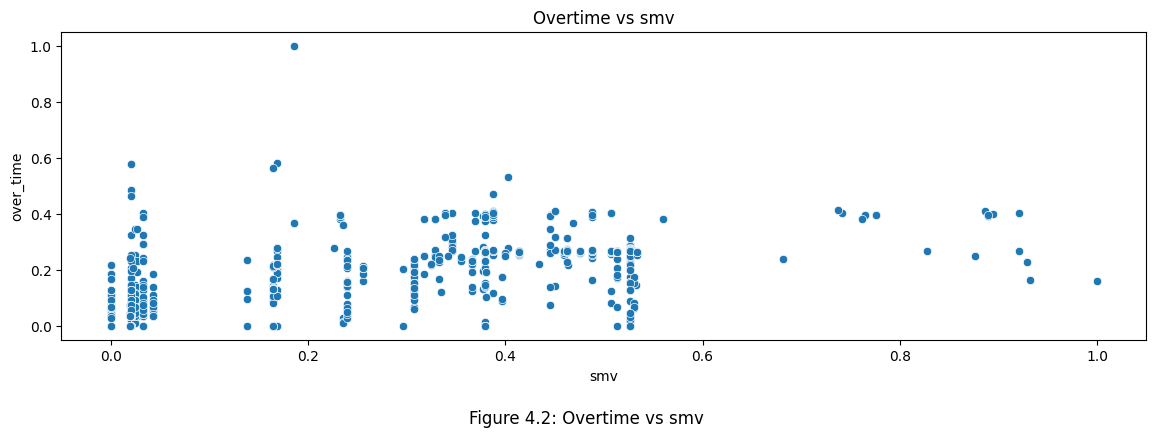

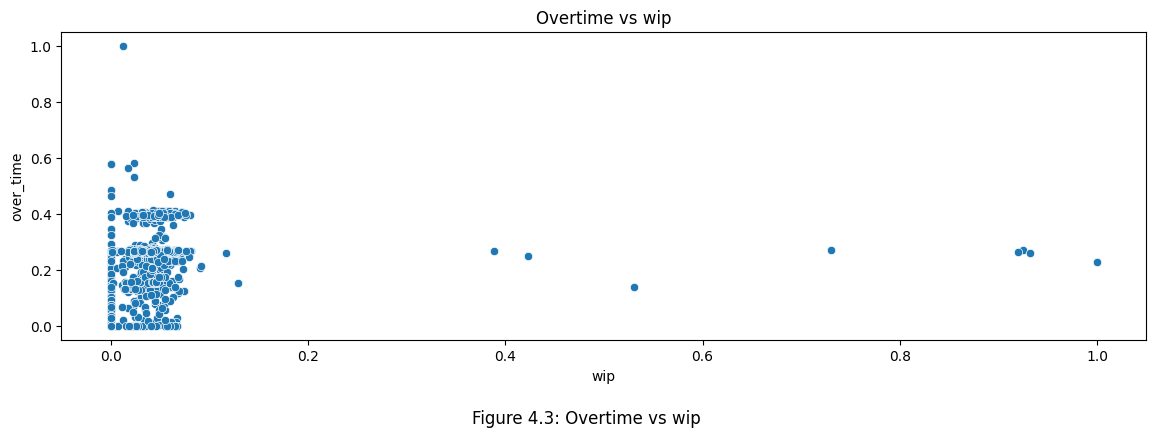

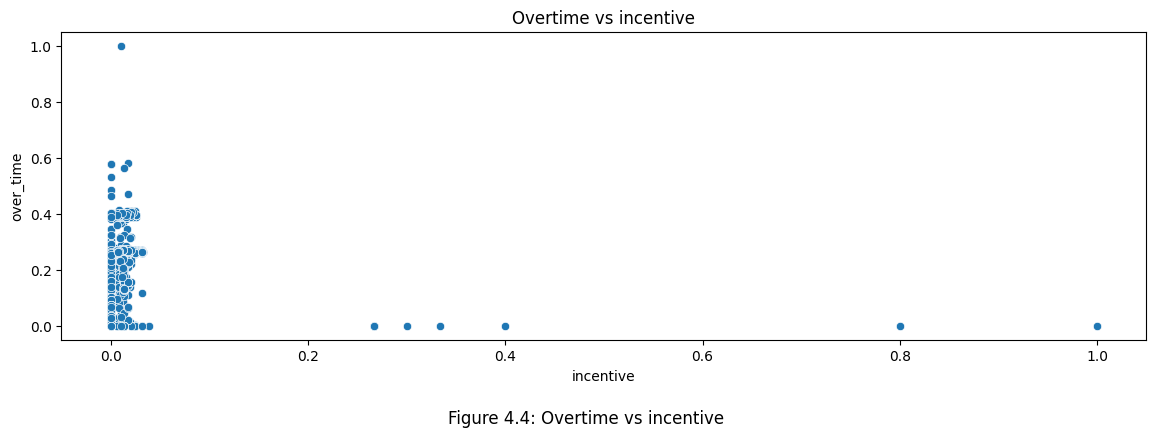

In [18]:
# Starting figure numbers
major_figure_number = 4  # Starting figure major number
minor_figure_number = 1  # Starting figure minor number


# Scatterplots for numeric columns
for col in ['no_of_workers', 'smv', 'wip', 'incentive']:
    # Create figure number
    figure_number = f"{major_figure_number}.{minor_figure_number}"
    
    plt.figure(figsize=(14, 4))  # Adjust figure size
    sns.scatterplot(x=col, y='over_time', data=df)
    plt.title(f'Overtime vs {col}')
    plt.figtext(0.5, -0.1, f"Figure {figure_number}: Overtime vs {col}", ha='center', fontsize=12)  # Add figure label as a caption
    plt.show()

    # Increment minor figure number
    minor_figure_number += 1


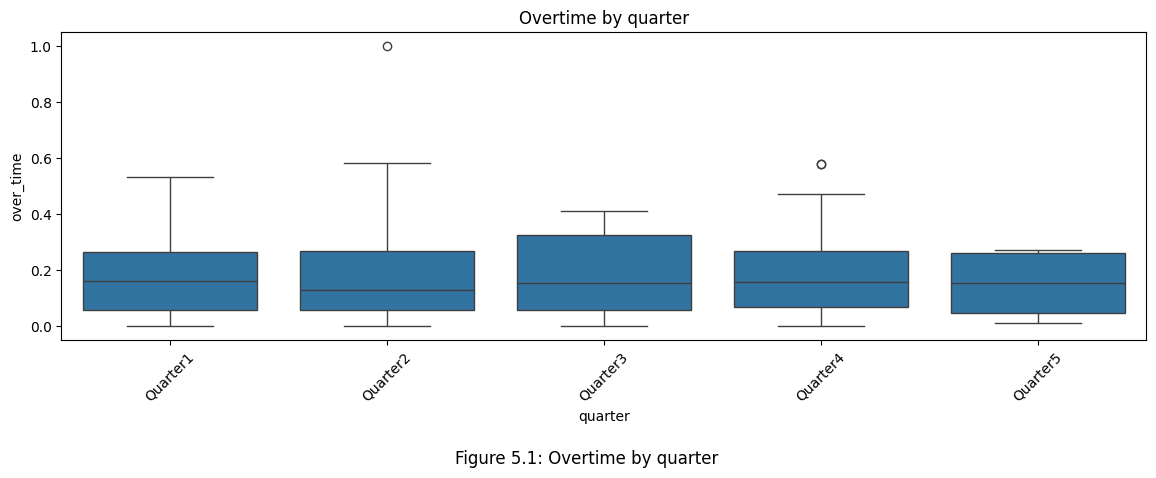

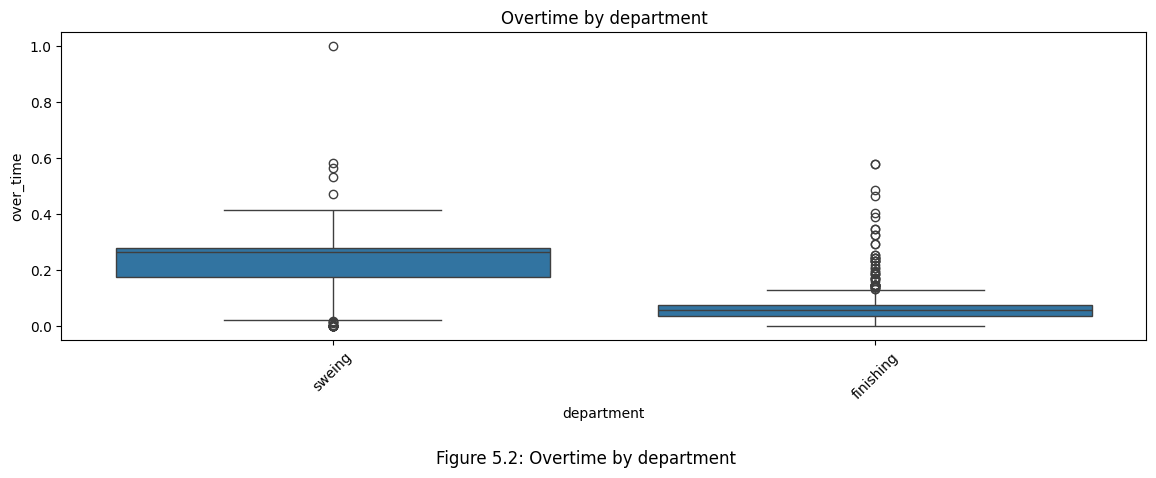

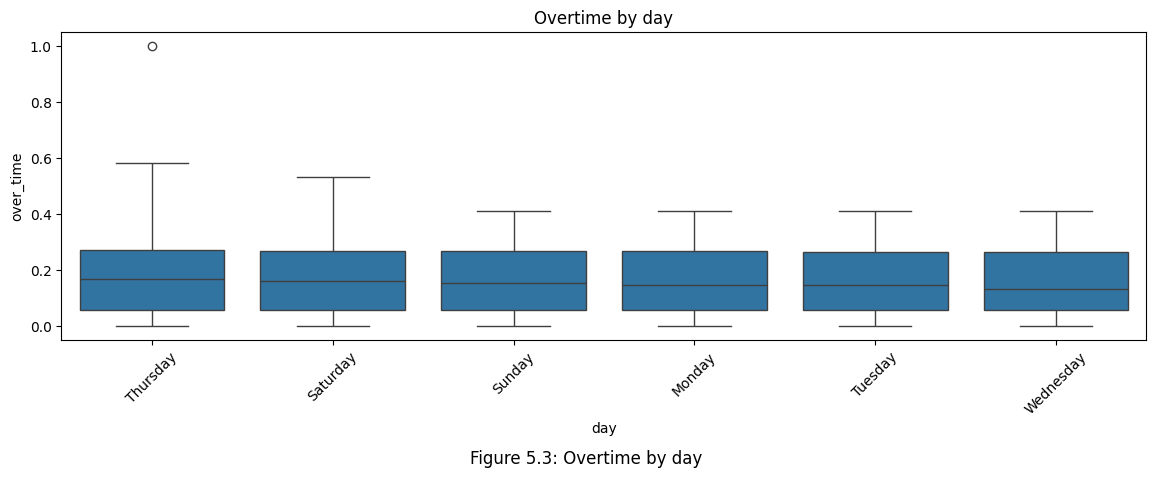

In [19]:
# Starting figure numbers
major_figure_number = 5  # Starting figure major number
minor_figure_number = 1  # Starting figure minor number

# Boxplots for categorical features
for col in ['quarter', 'department', 'day']:
    # Create figure number
    figure_number = f"{major_figure_number}.{minor_figure_number}"
    
    plt.figure(figsize=(14, 4))  # Adjust figure size
    sns.boxplot(x=col, y='over_time', data=df)
    plt.title(f'Overtime by {col}')
    plt.xticks(rotation=45)
    plt.figtext(0.5, -0.2, f"Figure {figure_number}: Overtime by {col}", ha='center', fontsize=12)  # Add figure label as a caption
    plt.show()

    # Increment minor figure number
    minor_figure_number += 1


And finally, here are the trend of overtime in terms of per month.

C:\Users\jorda\AppData\Local\Temp\ipykernel_8820\1729086345.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['over_time'].resample('M').mean().plot()


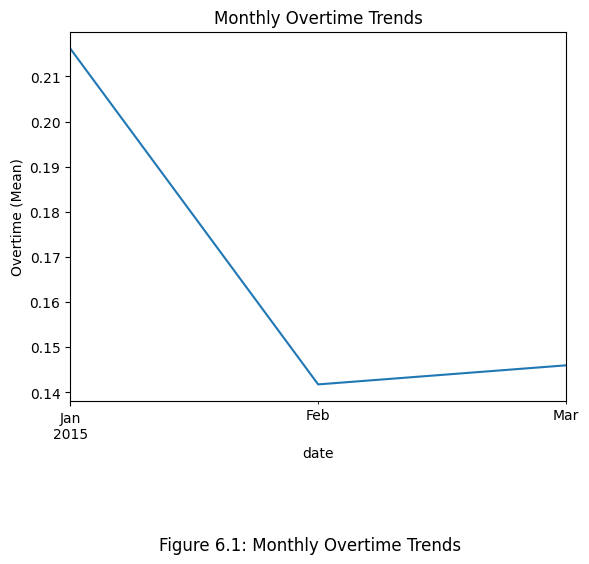

In [20]:
# Starting figure numbers
major_figure_number = 6  # Starting figure major number
minor_figure_number = 1  # Starting figure minor number

# Trends over time
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Create figure number
figure_number = f"{major_figure_number}.{minor_figure_number}"
df['over_time'].resample('M').mean().plot()
plt.title('Monthly Overtime Trends')
plt.ylabel('Overtime (Mean)')
plt.figtext(0.5, -0.2, f"Figure {figure_number}: Monthly Overtime Trends", ha='center', fontsize=12)  # Add figure label as a caption
plt.show()


After looking at the different points of view of this dataset, the researchers move on to making different models that can predict overtime.